<a href="https://colab.research.google.com/github/Dcal-dev/For-Study/blob/master/For_Study_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로그램을 공부하려고 처음 만들어본 COLAB

---

시작일 19.11.23

---








공부할거 
 RK4 룽게-쿠타 방법\
 컴퓨터 활용능력\
 Getpy\
I/O 중요\
Class 해서 exit qury closure\
Decorator\
http://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-decorator/
​
정규표현식 regular experession\
적분 테일러 전개\
​
해밀토니안
​
화성 지구 분사\
Kane's Method\
스트링 사용법


#프로그램의 기초 분야
* 프론트엔드(front-end) 
>이용자의 웹브라우저에서 직접적으로 보이는 부분을 다루는 기술들 \
 - HTML5, CSS3, 기본 JavaScript

* 백엔드(back-end) 
>웹브라우저가 주고받는 데이터를 기록하고 가져오는 등의 뒷 단의 궂은 일을 처리하는 기술들
* 데이터베이스(database) 
>백엔드가 다루는 데이터를 보관하고 검색해 오는 기술
* 네트워크(network) 
>여러 컴퓨터 사이의 데이터 통신에 필요한 기술들
* 에디터/툴/버전관리 시스템(tools) 
>각 주제 개발 작업에 필요한 도구들 선택과 활용
* 기초 자료 구조(data structure) 
>프론트엔드나 백엔드 프로그래밍 모두에 쓰이는 기초 지식. 데이터를 원하는 형태로 찾기 좋게 연결하는 구조.
* 리눅스/도커/AWS 
>백엔드와 데이터베이스를 운영할 기술과 환경




시작은 간단한거 부터

In [0]:
print("hello python")
print("Hello",end=' ')
print("alph")

hello python
Hello alph


print라는 명령어에 여러가지 옵션을 추가할수 있다.


#RETARDING FORCE 
___
도전 : 19.11.24 23:06
___
cf: [Matplotlib Tutorial 16 - Live graphs](https://www.youtube.com/watch?v=ZmYPzESC5YY)

cf: [Model Your World with the GlowScript Trinket](https://trinket.io/glowscript/1e541a5795) : 대충 이런 형태가 목표

참고 서적 : Classical Dynamics of partivels and systems (MARION) (p.58~71)
* retarding force는 kmv로만 적용한다.


##BULLET

*주의! 같은 단어를 사용하게 된다면 colab에서는 한단어로 인식해주기 때문에 초기화하는 작업이 필요함

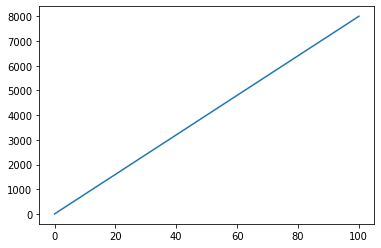

In [0]:
#@title 
import matplotlib.pyplot as plt
from math import cos,exp

#for non retarding force in 1d motion
x0=0
t=0
x=0
xarr=[]
xarr.append(x0)

tarr=[]
tarr.append(t)
v0=80
dt=0.05
dx=v0*dt

while t<=100:
  t+=dt
  x=x+dx
  xarr.append(x)
  tarr.append(t)
  
  
plt.plot(tarr,xarr)
plt.show()




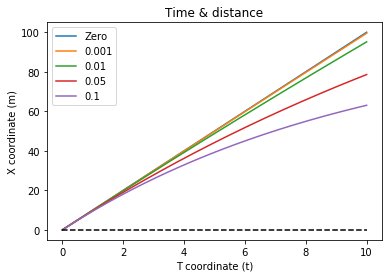

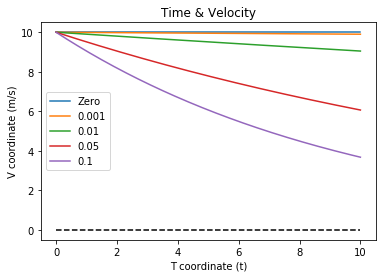

In [0]:
#@title retarding force 가 v에 비례할경우
from math import exp
from matplotlib import pyplot as plt

class bullet:
    def __init__(self,v0,x0,k,timelimit):
        self.v=v0
        self.v0=v0
        self.x=x0
        self.k=k

        self.t=0
        
        self.time=0
        self.timelimit=timelimit
        self.varr=[self.v]
        self.xarr=[self.x]
        self.tarr=[self.t]

    def updateT(self, dt):
        self.t+=dt
        return self.t

    def updateV(self, dt):
        self.v=self.v0*(exp(-self.k*self.updateT(dt)))
        
        return self.v

    def updateX(self, dt):
        self.x=self.x+self.updateV(dt)*dt
        
        return self.x

    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.time=self.time+dt
        self.tarr.append(self.time)
        self.varr.append(self.v)
        return

def MakeShoot(v0,x0,k,timelimit):
    Bullet=bullet(v0,x0,k,timelimit)
    dt=0.05

    while Bullet.time<=timelimit:
        Bullet.step(dt)

    return Bullet.tarr,Bullet.xarr,Bullet.varr

def main():
    tl=10
    v0=10
    x0=0
    TZero,XZero,VZero   = MakeShoot(v0,x0,0.000,tl)
    T0_001,X0_001,V0_001= MakeShoot(v0,x0,0.001,tl)
    T0_01,X0_01,V0_01   = MakeShoot(v0,x0,0.01,tl)
    T0_05,X0_05,V0_05   = MakeShoot(v0,x0,0.05,tl)
    T0_1,X0_1,V0_1      = MakeShoot(v0,x0,0.1,tl)
    plt.figure("Time & distance")
    plt.plot(TZero,XZero, T0_001,X0_001, T0_01,X0_01, 
             T0_05,X0_05, T0_1,X0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & distance")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('X coordinate (m)')
    plt.show("Time & distance")
    plt.figure("Time & Velocity")
    plt.plot(TZero,VZero, T0_001,V0_001, T0_01,V0_01, 
             T0_05,V0_05, T0_1,V0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & Velocity")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('V coordinate (m/s)')
    plt.show("Time & Velocity")

if __name__ == '__main__':
    main()



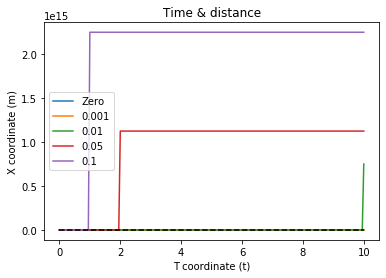

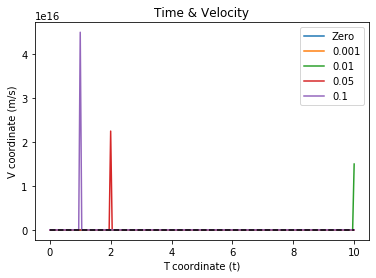

In [0]:
#@title retarding force 가 v의 제곱일 경우

from math import exp
from matplotlib import pyplot as plt

class bulletDuble:
    def __init__(self,v0,x0,k,timelimit):
        self.v=v0
        self.v0=v0
        self.x=x0
        self.k=k

        self.t=0
        
        self.time=0
        self.timelimit=timelimit
        self.varr=[self.v]
        self.xarr=[self.x]
        self.tarr=[self.t]

    def updateT(self, dt):
        self.t+=dt
        return self.t

    def updateV(self, dt):
        self.v=self.v0/(self.v0*self.k*self.updateT(dt)-1)
        
        return self.v

    def updateX(self, dt):
        self.x=self.x+self.updateV(dt)*dt
        
        return self.x

    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.time=self.time+dt
        self.tarr.append(self.time)
        self.varr.append(self.v)
        return

def MakeShoot(v0,x0,k,timelimit):
    Bullet=bulletDuble(v0,x0,k,timelimit)
    dt=0.05

    while Bullet.time<=timelimit:
        Bullet.step(dt)

    return Bullet.tarr,Bullet.xarr,Bullet.varr

def main():
    tl=10
    v0=10
    x0=0
    TZero,XZero,VZero   = MakeShoot(v0,x0,0.000,tl)
    T0_001,X0_001,V0_001= MakeShoot(v0,x0,0.001,tl)
    T0_01,X0_01,V0_01   = MakeShoot(v0,x0,0.01,tl)
    T0_05,X0_05,V0_05   = MakeShoot(v0,x0,0.05,tl)
    T0_1,X0_1,V0_1      = MakeShoot(v0,x0,0.1,tl)
    plt.figure("Time & distance")
    plt.plot(TZero,XZero, T0_001,X0_001, T0_01,X0_01, 
             T0_05,X0_05, T0_1,X0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & distance")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('X coordinate (m)')
    plt.show("Time & distance")
    plt.figure("Time & Velocity")
    plt.plot(TZero,VZero, T0_001,V0_001, T0_01,V0_01, 
             T0_05,V0_05, T0_1,V0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & Velocity")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('V coordinate (m/s)')
    plt.show("Time & Velocity")

if __name__ == '__main__':
    main()



##PROJECTILE MOTION

Q. python에서 벡터를 구현할수 있을까?

A.리스트를 사용하면 구할수 있지 않을까? 

-> 실패, 리스트끼리 더하면 요소가 추가되어 버린다.\
numpy를 이용하면 비교적 쉽게 구현할수 있을것 같다.\
확인 완료 

In [0]:
import numpy as np
v=[80,80]
a=[0,-9.8]
print(v+a)
V=np.array(v)
A=np.array(a)
print(V+A)

[80, 80, 0, -9.8]
[80.  70.2]


numpy를 이용하여 리스트를 어레이로 만들고 더한다.

7.249999999999982


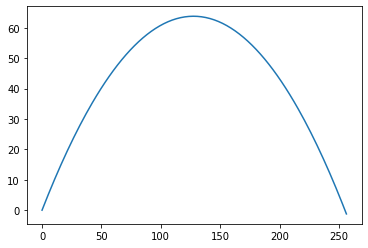

In [0]:
import numpy as np
from math import radians,sin,cos,pi
import matplotlib.pyplot as plt
deg=45
theta=deg*pi/180
v0=50
v=v0*np.array([cos(theta),sin(theta)])
a=np.array([0,-9.8])
#print(v*a)
#print((v*a)[0],(v*a)[1])

v0=v
t=0
dt=0.05
x0=0
y0=0
X=[x0]
Y=[y0]
while True:
    t+=dt
    x= v*t+0.5*a*t**2
    X.append(x[0])
    Y.append(x[1])
    if x[1]<=0: break
    

    #print(x)

print(t)
plt.figure(1)
plt.plot(X,Y)
plt.show(1)



     4.100
     5.800
     7.100
     7.900


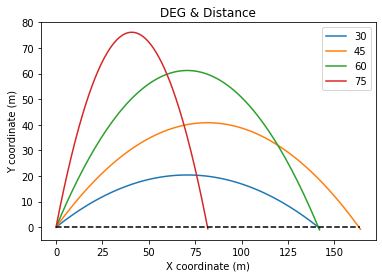

In [0]:
#자 이제 클레스를 사용해서 만들어 보자.
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sin, cos, radians, pi
class pow:
    def __init__(self,x0,y0,v0,deg):
        self.theta=deg*pi/180
        self.v=v0*np.array([cos(self.theta),sin(self.theta)])
        self.a=np.array([0,-9.8])
        self.t=0
        self.x=x0
        self.y=y0
        self.DP=np.array([x0,y0])
        
        self.xarr=[self.DP[0]]
        self.yarr=[self.DP[1]]
    
    def updateDP(self,t):
        self.DP=self.v*t+0.5*self.a*t**2
        return self.DP[0],self.DP[1]
    
    def step(self,dt):
        self.t=self.t+dt
        self.x,self.y=self.updateDP(self.t)
        self.xarr.append(self.x)
        self.yarr.append(self.y)
        return

def MS(x0,y0,v0,deg):
    POW=pow(x0,y0,v0,deg)
    dt=0.05
    while POW.y>=0:
        POW.step(dt)
    return POW.xarr,POW.yarr,POW.t


def main():
    x0=0
    y0=0
    v0=40
    
    X30,Y30,T30=MS(x0,y0,v0,30)
    X45,Y45,T45=MS(x0,y0,v0,45)
    X60,Y60,T60=MS(x0,y0,v0,60)
    X75,Y75,T75=MS(x0,y0,v0,75)
    plt.figure()
    plt.title("DEG & Distance")
    
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    
    plt.plot(X30,Y30, X45,Y45, X60,Y60, X75,Y75,
             [0, X45[-1]], [0, 0],'k--')
    plt.legend(['30','45','60','75'])
    for X in [T30,T45,T60,T75]:
        print("%10.3f"%X)
    plt.show()


if __name__=='__main__':
    main()




##Retarding Force가 존재할때

    11.950
    11.850
    11.050
    10.350


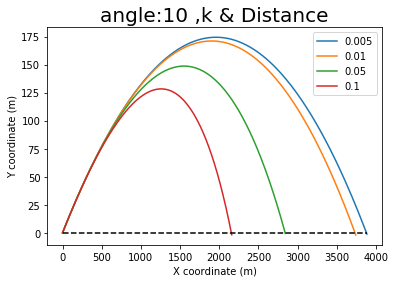

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sin, cos, pi
class pow_re:
    def __init__(self,x0,y0,v0,deg,k):
        self.theta=deg*pi/180
        self.v=v0*np.array([cos(self.theta),sin(self.theta)])
        self.k=k
        self.t=0
        self.x=x0
        self.x0=x0
        self.y0=y0
        self.y=y0
        self.DP=np.array([x0,y0])
        self.g=9.8
        self.xarr=[self.DP[0]]
        self.yarr=[self.DP[1]]
    
    def updateDP(self,t):
        self.x=self.x0+self.v[0]/self.k*(1-exp(-self.k*t))
        self.y=self.y0-self.g*t/self.k+(self.k*self.v[1]+self.g)/(self.k**2)*(1-exp(-self.k*t))
        return self.x,self.y
    
    def step(self,dt):
        self.t=self.t+dt
        self.x,self.y=self.updateDP(self.t)
        self.xarr.append(self.x)
        self.yarr.append(self.y)
        return

def MS(x0,y0,v0,deg,k):
    POW=pow_re(x0,y0,v0,deg,k)
    dt=0.05
    while POW.y>=0:
        POW.step(dt)
    return POW.xarr,POW.yarr,POW.t


def main():
    x0=0
    y0=0
    v0=340
    ang=10
    
    X45_005,Y45_005,T45_005=MS(x0,y0,v0,ang,0.005)
    X45_01,Y45_01,T45_01=MS(x0,y0,v0,ang,0.01)
    X45_05,Y45_05,T45_05=MS(x0,y0,v0,ang,0.05)
    X45_1,Y45_1,T45_1=MS(x0,y0,v0,ang,0.1)
    plt.figure()
    plt.title("angle:%s ,k & Distance"%ang,fontsize=20)
    
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    
    plt.plot(X45_005,Y45_005,X45_01,Y45_01,X45_05,Y45_05,
             X45_1,Y45_1,
             [0, X45_005[-1]], [0, 0],'k--')
    plt.legend(['0.005','0.01','0.05','0.1'])
    for X in [T45_005,T45_01,T45_05,T45_1]:
        print("%10.3f"%X)
    plt.show()
    
if __name__=='__main__':
    main()


##움직이는 물체의 공기저항
물체의 공기저항과 마찰력을 생각해 보았을때 정지하는 시간과 이동거리는 어떻게 나올까?

물체가 움직일떼 마찰력이 없다면, 멈추지 않고 계속 나아간다. 하지만 공기저항이 있는경우에는 위에서 했던겄처럼 속도가 느려지지만 멈추지는 않는다. 그렇다면 둘다있다면 어떻게 될것인가?

    26.550
    25.000
    17.700
    13.450


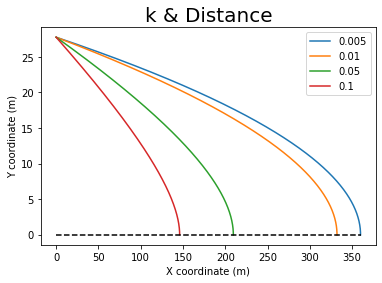

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

class CAR:
    def __init__(self,x0,v0,myu,k):
        self.x0=x0
        self.v=v0
        self.v0=v0
        self.k=k
        self.m=myu
        self.g=9.8
        self.t=0
        self.xarr=[self.x0]
        self.varr=[self.v0]
    def updateV(self,t):
        self.v=(self.k*self.v0+self.m*self.g)/self.k*exp(-self.k*t)-self.m*self.g/self.k
        return self.v
    def updateX(self,t):
        self.x=self.x0+(self.k*self.v0+self.m*self.g)/(self.k**2)*(1-exp(-self.k*t))-self.m*self.g*t/self.k
        return self.x
    def step(self,dt):
        self.t+=dt
        v=self.updateV(self.t)
        x=self.updateX(self.t)
        self.xarr.append(x)
        self.varr.append(v)
        return

def MS(x0,v0,myu,k):
    Car=CAR(x0,v0,myu,k)
    dt=0.05
    while Car.v>=0:
        Car.step(dt)
    return Car.xarr,Car.varr,Car.t

#여기서 부터 좀더 수정하기
def main():
    x0=0
    vh=100
    v0=vh*10/36
    myu=0.1

    
    X45_005,Y45_005,T45_005=MS(x0,v0,myu,0.005)
    X45_01,Y45_01,T45_01=MS(x0,v0,myu,0.01)
    X45_05,Y45_05,T45_05=MS(x0,v0,myu,0.05)
    X45_1,Y45_1,T45_1=MS(x0,v0,myu,0.1)
    plt.figure()
    plt.title("k & Distance",fontsize=20)
    
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    
    plt.plot(X45_005,Y45_005,X45_01,Y45_01,X45_05,Y45_05,
             X45_1,Y45_1,
             [0, X45_005[-1]], [0, 0],'k--')
    plt.legend(['0.005','0.01','0.05','0.1'])
    for X in [T45_005,T45_01,T45_05,T45_1]:
        print("%10.3f"%X)
    plt.show()
    
if __name__=='__main__':
    main()

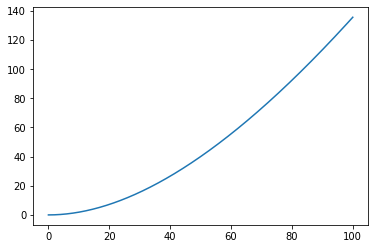

In [0]:
import numpy as np
import matplotlib.pyplot as plt



def distance(v0,myu,k):
    m=myu
    g=9.8
    vh=v0*10/36
    return vh/k-m*g/(k**2)*np.log(k*vh/(m*g)+1)
x=np.linspace(0,100,1000)
m=0.2
k=0.05

plt.figure()
plt.plot(x,distance(x,m,k))
plt.show()


##matplotlib animation사용법

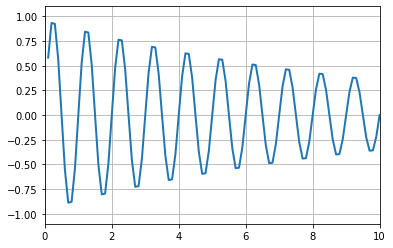

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
                              repeat=False, init_func=init)


HTML(ani.to_html5_video())

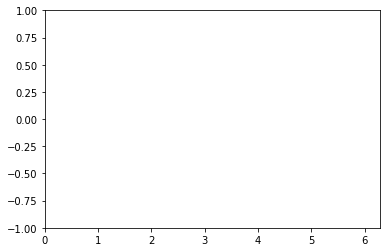

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
HTML(ani.to_html5_video())

##LEGRANGIAN METHOD for COMPLEX MOVEMENT

라그랑지안 방법을 사용하면 복잡한 움직임을 보다 쉽게 물체의 움직임을 나타낼수있다.
2차 미방을 수치적인 방법을 통해서 풀수있다.

In [0]:
#참고적으로 찾아본 방법
#Program Of Runge-Kutta 4th Order
from math import *

def f(t,y):
    return sin(y**t)
def main():
    t0,y0=float(input("initial time:")),float(input("initial value:"))
    h=float(input("interval size:"))
    t=float(input("terminal time:"))
    print("t\ty\n",'_'*16)
    while t0<t:
        k1=h*f(t0,y0)
        k2=h*f(t0+h/2.,y0+k1/2.)
        k3=h*f(t0+h/2.,y0+k2/2.)
        k4=h*f(t0+h,y0+k3)
        y1,t1=y0+h/6.*(k1+(2*k2)+(2*k3)+k4),t0+h
        print("%.4f\t%.4f"%(t1,y1))
        t0,y0=t1,y1
main()


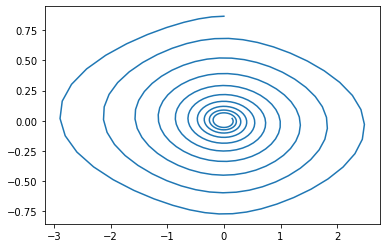

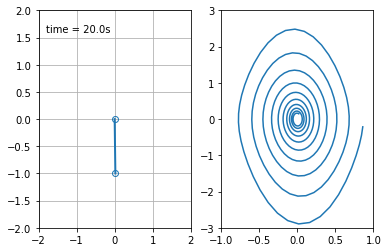

In [0]:
#single pendulum
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

from numpy import pi,sin,cos


G=9.8
L=1
b=0.3
m=1
def simple_pe(state,t):
    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[1]=(-b/m)*state[1]-G/L*sin(state[0])
    return dxdt

ini_theta=60
ini_omega=0

state=np.radians([ini_theta,ini_omega])

dt=0.05
t=np.arange(0,20,dt)

INT=integrate.odeint(simple_pe,state,t)
x=L*sin(INT[:,0])
y=-L*cos(INT[:,0])

dxdt=L*cos(INT[:,0])*INT[:,1]
dydt=L*sin(INT[:,0])*INT[:,1]
plt.figure("dxdt,x")
plt.plot(dxdt,x)
plt.show("dxdt,x")


colors = [[1,0,0,0],[1,0,0,0.4],[0,0.8,0.6,0.9]]
cmap = LinearSegmentedColormap.from_list("", colors)



fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

ax2 = fig.add_subplot(122,xlim=(-1, 1), ylim=(-3, 3))
cache= ax.scatter([], [],c=[], cmap=cmap, vmin=0,vmax=1,lw=0.01)



line, = ax.plot([], [], 'o-', lw=2,markerfacecolor="None")

line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x[i])
    CX.append(x[i])
    CY.append(y[i])
    dXdt.append(dxdt[i])
    line2.set_data(X,dXdt)
    cache.set_offsets(np.c_[CX,CY])
    inte= np.concatenate((np.array(inte)*0.985, np.ones(len(CX))))
    cache.set_array(inte)




    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(INT)),
                              interval=25, blit=True, init_func=init)
#plt.show()
#ani.save('double_pendulum.mp4', fps=15)
HTML(ani.to_html5_video())

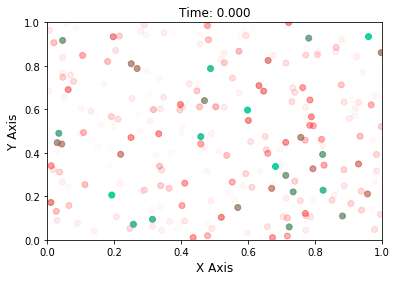

In [0]:
###참고한 코드###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
fig, ax = plt.subplots()
ax.set_xlabel('X Axis', size = 12)
ax.set_ylabel('Y Axis', size = 12)
ax.axis([0,1,0,1])
x_vals = []
y_vals = []
intensity = []
iterations = 100

t_vals = np.linspace(0,10, iterations)

colors = [[1,0,0,0],[1,0,0,0.4],[0,0.8,0.6,0.9]]
## rgb alpha
cmap = LinearSegmentedColormap.from_list("", colors)
#scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

def get_new_vals():
    n = np.random.randint(1,5)
    x = np.random.rand(n)
    y = np.random.rand(n)
    return list(x), list(y)

def update(t):
    global x_vals, y_vals, intensity
    # Get intermediate points
    new_xvals, new_yvals = get_new_vals()
    x_vals.extend(new_xvals)
    y_vals.extend(new_yvals)

    # Put new values in your plot
    scatter.set_offsets(np.c_[x_vals,y_vals])
    # np.c_ : 행렬 붙이가


    #calculate new color values
    intensity = np.concatenate((np.array(intensity)*0.96, np.ones(len(new_xvals))))
    scatter.set_array(intensity)
    #set_array ==색을 설정해 주는 메소드

    # Set title
    ax.set_title('Time: %0.3f' %t)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=t_vals,interval=50)
HTML(ani.to_html5_video())

#DOUBLE PENDULUM

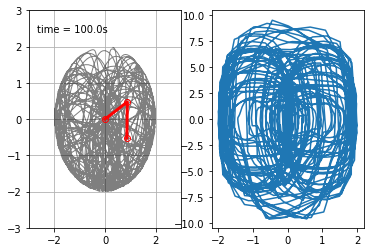

In [0]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

from numpy import pi,sin,cos

G=9.8
L1=1
L2=1


m1=1
m2=2

the1=170
ome1=0
the2=172
ome2=0

state=np.radians([the1,ome1,the2,ome2])

def doub_pen(state,t):
    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[2]=state[3]
    alp1=L2/L1*(m2/(m1+m2))*cos(state[0]-state[2])
    alp2=L1/L2*cos(state[0]-state[2])
    f1=-L2/L1*(m2/(m1+m2))*(state[3]**2)*sin(state[0]-state[2])-G/L1*sin(state[0])
    f2=L1/L2*(state[1]**2)*sin(state[0]-state[2])-G/L2*sin(state[2])
    g1=(f1-alp1*f2)/(1-alp1*alp2)
    g2=(-alp2*f1+f2)/(1-alp1*alp2)
    dxdt[1]=g1
    dxdt[3]=g2
    return dxdt

dt=0.05
t=np.arange(0,100,dt)

INT=integrate.odeint(doub_pen,state,t)
x1=L1*sin(INT[:,0])
y1=-L1*cos(INT[:,0])

x2=x1+L2*sin(INT[:,2])
y2=y1-L2*cos(INT[:,2])

dx1dt=L1*cos(INT[:,0])*INT[:,1]
dy1dt=L1*sin(INT[:,0])*INT[:,1]

dx2dt=dx1dt+L2*cos(INT[:,2])*INT[:,3]
dy2dt=dy1dt+L2*sin(INT[:,2])*INT[:,3]
'''
plt.figure("dxdt,x")
plt.plot(dxdt,x)
plt.show("dxdt,x")
'''

MAXdx=max(dx2dt)
MAXx=max(x2)


fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-(L1+L2)*1.5, (L1+L2)*1.5), 
                     ylim=(-(L1+L2)*1.5, (L1+L2)*1.5))
ax.grid()

ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)



line, = ax.plot([], [], 'ro-', lw=3,markerfacecolor="None")

line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [0, x1[i],x2[i]]
    thisy = [0, y1[i],y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x2[i])
    CX.append(x2[i])
    CY.append(y2[i])
    dXdt.append(dx2dt[i])
    line2.set_data(X,dXdt)
    cache.set_data(CX,CY)
    '''
    그래프 형식이 scatter일때
    cache.set_offsets(np.c_[CX,CY])
    inte= np.concatenate((np.array(inte)*0.985, np.ones(len(CX))))
    
    cache.set_array(inte)

'''


    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(INT)),
                              interval=50/2.5, blit=True, init_func=init)
#plt.show()
#ani.save('double_pendulum.mp4', fps=15)
HTML(ani.to_html5_video())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


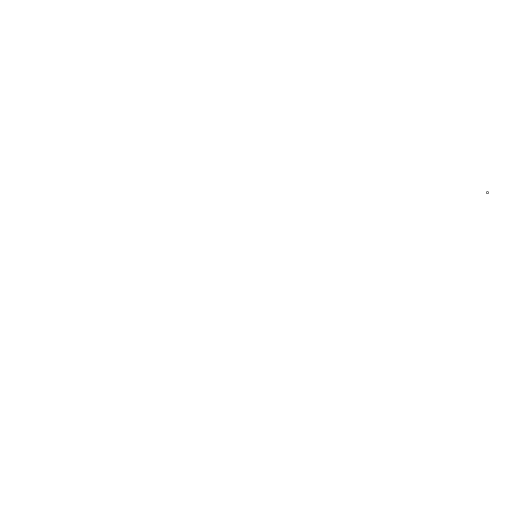

In [0]:
####sclab###
"""
===============
Rain simulation
===============

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()
HTML(animation.to_html5_video())

##CLASSICAL DYNAMICS example 7.5 p.243

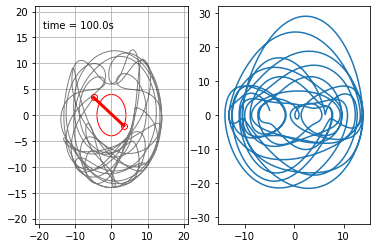

In [0]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import cos,sin
from IPython.display import HTML
import matplotlib.animation as animation



### Initial condition ###
G=9.8
a=4     #회전하는 원판의 길이
b=10    #줄의 길이

w=1    #각속도
theta=75#초기 줄의 각도
omega=0 #initial angular velocity

### state ###
state=np.radians([theta,omega])

dt=0.03
t=np.arange(0,100,dt)
tc=0
### def derivs func
def derivs(state,t):
    
    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[1]=(w**2)*a/b*cos(state[0]-w*t)-G/b*sin(state[0])
    return dxdt

T=odeint(derivs,state,t)

x0=a*cos(w*t)
y0=a*sin(w*t)

x=a*cos(w*t)+b*sin(T[:,0])
y=a*sin(w*t)-b*cos(T[:,0])

dx=-a*w*sin(w*t)+b*T[:,1]*cos(T[:,0])
dy=a*w*cos(w*t)+b*T[:,1]*sin(T[:,0])

MAXdx=max(dx)
MAXx=max(x)


fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-(a+b)*1.5, (a+b)*1.5), 
                     ylim=(-(a+b)*1.5, (a+b)*1.5))
ax.grid()

ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)
circle=plt.Circle((0,0),a,color='r',fill=False)
ax.add_artist(circle)

line, = ax.plot([], [], 'ro-', lw=3,markerfacecolor="None")
line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [x0[i], x[i]]
    thisy = [y0[i], y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x[i])
    CX.append(x[i])
    CY.append(y[i])
    dXdt.append(dx[i])
    line2.set_data(X,dXdt)
    cache.set_data(CX,CY)
    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(T)),
                              interval=dt*1000/3, blit=True, init_func=init)

HTML(ani.to_html5_video())


##EX 7-18 p. 282


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in multiply


ValueError: ignored

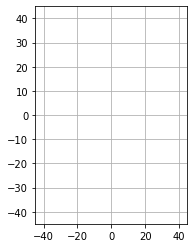

In [0]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import cos,sin
from IPython.display import HTML
from matplotlib.patches import Arc,Wedge
import matplotlib.animation as animation

### Initial condition ###
G=9.8
R=5     #강체의 반지름
l=25    #줄의 길이

theta=9.8 #초기 줄의 각도
omega=0 #initial angular velocity

### state ###
state=np.radians([theta,omega])

dt=0.05
t=np.arange(0,6,dt)

### def derivs func
def derivs(state,t):
    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[1]=R/(l-R*state[0])*(state[1]**2)+G*cos(state[0])
    return dxdt

T=odeint(derivs,state,t)

x0=R*sin(T[:,0])
y0=R*cos(T[:,0])

x=R*sin(T[:,0])+(l-R*T[:,0])*cos(T[:,0])
y=R*cos(T[:,0])-(l-R*T[:,0])*sin(T[:,0])

the=90-T[:,0]

dx=R*T[:,0]*T[:,1]*sin(T[:,0])-l*T[:,1]*sin(T[:,0])
dy=R*T[:,0]*T[:,1]*cos(T[:,0])-l*T[:,1]*cos(T[:,0])
MAXdx=max(dx)
MAXx=max(x)

fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-(R+l)*1.5, (R+l)*1.5), 
                     ylim=(-(R+l)*1.5, (R+l)*1.5))
ax.grid()

def theta(degree):
    De=degree
    ARC=Wedge((0,0),R,theta1=De,theta2=90, edgecolor='r', width=3,fill=False)
    return ax.add_patch(ARC)

#ARC=Arc((0,0),R,R,theta1=30,theta2=90, edgecolor='r', lw=3)
#ax.add_patch(ARC)

ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)
circle=plt.Circle((0,0),R,color='r',fill=False)
ax.add_artist(circle)


ax.patch

line, = ax.plot([], [], 'r', lw=3)#,markerfacecolor="None")
line2, = ax2.plot([],[])

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    #ARC.set_text('')
    
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    
    thisx = [x0[i], x[i]]
    thisy = [y0[i], y[i]]
    

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x[i])
    CX.append(x[i])
    
    theta(the[i])


    CY.append(y[i])
    dXdt.append(dx[i])
    line2.set_data(X,dXdt)
    cache.set_data(CX,CY)
    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(T)),interval=dt*1000/3,blit=True, init_func=init)

HTML(ani.to_html5_video())

In [0]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

fig = plt.figure()
ax = fig.add_subplot(111) 

circle1 = patches.Circle((0.3, 0.3), 0.03, fc='r', alpha=0.5)
circle2 = patches.Circle((0.4, 0.3), 0.03, fc='r', alpha=0.5)
button = Button(plt.axes([0.8, 0.025, 0.1, 0.04]), 'Reset', color='g', hovercolor='0.975')
ax.add_patch(circle1)
ax.add_patch(circle2)

def reset(event):
    circle1.remove()

button.on_clicked(reset)
plt.show()

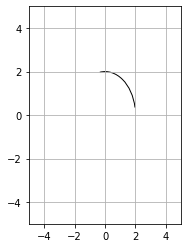

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import HTML
from matplotlib.patches import Arc,Wedge
import matplotlib.animation as animation
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-5,5), 
                     ylim=(-5,5))
ax.grid()
def theta(the):
    ARC=Arc((0,0),4,4,theta1=the,theta2=100)
    
    return ARC

angle=np.arange(-90,89,100)
def init():
    return []
def animate(i):
    patch=[]
    patch.append(ax.add_patch(theta(angle[i])))
    return patch
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(angle)),interval=10,blit=True, init_func=init)

HTML(ani.to_html5_video())

In [0]:

##참고한 코드
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
nx = 20
ny = 20

fig = plt.figure()
plt.axis([0,nx,0,ny])
ax = plt.gca()
ax.set_aspect(1)

def init():
    # initialize an empty list of cirlces
    return []

def animate(i):
    # draw circles, select to color for the circles based on the input argument i. 
    someColors = ['r', 'b', 'g', 'm', 'y']
    patches = []
    patches.append(ax.add_patch(plt.Circle((0.5,0.5),0.45,color=someColors[i % 5]) ))
    return patches

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)
plt.show()
HTML(anim.to_html5_video())

##Example : 7-40 

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in sin
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sin
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in cos
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: R

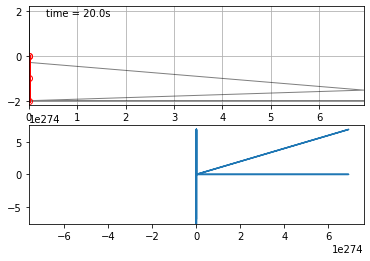

In [0]:
#@title 실패 0
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

from numpy import pi,sin,cos

G=9.8
b=1

m=1

s_x=0
s_v=10
the1=17
ome1=0
the2=31
ome2=0

state=np.array([s_x,s_v,np.radians(the1),np.radians(ome1),np.radians(the2),np.radians(ome2)])


def MOV_doub_pen(state,t):
    dxdt=np.zeros_like(state)
    a1,a2,a3=cos(state[2]),cos(state[4]),cos(state[2]-state[4])
    DetA=(b**2)/2*(2-a3**2+a1**2-a2**2)
    f1=b/4*(2*sin(state[2])*(state[3]**2)+(state[5]**2)*(sin(state[4])))
    f2=-b/2*(state[5]**2)*sin(state[2]-state[4])+G*sin(state[2])
    f3=b*(state[3]**2)*sin(state[2]-state[4])-G*sin(state[4])

    g1=(f1-a1*f2+a2*f3)/DetA
    g2=(b/2*a1*f1-b*f2-b*a3*f3)/DetA
    g3=(-b/4*a2*f1-b/2*a3*f2+b*f3)/DetA

    dxdt[1],dxdt[3],dxdt[5]=g1,g2,g3
    dxdt[0],dxdt[2],dxdt[4]=state[1],state[3],state[5]

    return dxdt


#cf dxdt=np.radians([s_x,s_v,theta1,ome1,theta2,ome2])
dt=0.1
t=np.arange(0,20,dt)

INT=integrate.odeint(MOV_doub_pen,state,t)

x0=INT[:,0]
y0=0

x1=x0+b*sin(INT[:,2])
y1=y0-b*cos(INT[:,2])

x2=x1+b*sin(INT[:,4])
y2=y1-b*cos(INT[:,4])

dx0dt=INT[:,1]
dy0dt=0

dx1dt=dx0dt+b*cos(INT[:,2])*INT[:,3]
dy1dt=dy0dt+b*sin(INT[:,2])*INT[:,3]

dx2dt=dx1dt+b*cos(INT[:,4])*INT[:,5]
dy2dt=dy1dt+b*sin(INT[:,4])*INT[:,5]


MAXdx=max(dx2dt)
MAXx=max(x2)
MINx=min(x2)

fig = plt.figure()
ax = fig.add_subplot(211, autoscale_on=False, xlim=(MINx-b,MAXx+b), 
                     ylim=(-(2*b)*1.1, (2*b)*1.1))
ax.grid()

ax2 = fig.add_subplot(212,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)



line, = ax.plot([], [], 'ro-', lw=3,markerfacecolor="None")

line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [0,x0[i], x1[i],x2[i]]
    thisy = [0,0, y1[i],y2[i]]

    #ax.set_xlim()

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x2[i])
    CX.append(x2[i])
    CY.append(y2[i])
    dXdt.append(dx2dt[i])
    line2.set_data(X,dXdt)
    cache.set_data(CX,CY)
    '''
    그래프 형식이 scatter일때
    cache.set_offsets(np.c_[CX,CY])
    inte= np.concatenate((np.array(inte)*0.985, np.ones(len(CX))))
    
    cache.set_array(inte)

'''


    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(INT)),
                              interval=30/2, blit=True, init_func=init)
#plt.show()
#ani.save('double_pendulum.mp4', fps=15)
HTML(ani.to_html5_video())

##Example 7-34

In [0]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import cos,sin
from IPython.display import HTML
import matplotlib.animation as animation



### Initial condition ###
G=9.8
R=10
m=1
M=2
X0=0
dX0=0
theta=75#초기 각도
omega=0 #initial angular velocity

### state ###
state=np.array([X0,dX0,np.radians(theta),np.radians(omega)])


dt=0.03
t=np.arange(0,10,dt)
tc=0
### def derivs func
def derivs(state,t):
    a=m/(m+M)
    invdet=1/(a*(sin(state[2])**2)-1)
    f1=a*R*(state[3]**2)*cos(state[2])
    f2=-G*cos(state[2])
    a1=-sin(state[2])/R
    a2=a*R*sin(state[2])
    g1=invdet*(f1+a1*f2)
    g2=invdet*(a2*f1-f2)

    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[1]=g1
    dxdt[2]=state[3]
    dxdt[3]=g2
    return dxdt

T=odeint(derivs,state,t)

x0=T[:,0]
y0=0

x=R*cos(T[:,2])+x0
y=-R*sin(T[:,2])

#dx=-a*w*sin(w*t)+b*T[:,1]*cos(T[:,0])
#dy=a*w*cos(w*t)+b*T[:,1]*sin(T[:,0])

#MAXdx=max(dx)
MAXx=max(x)
MINx=min(x)
MAXx0=max(x0)
MAXy=max(y)
MINy=min(y)
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(MINx, MAXx), 
                     ylim=(MINy-4, MAXy+4))
ax.grid()

#ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)
#circle=plt.Circle((0,0),a,color='r',fill=False)
#ax.add_artist(circle)

line, = ax.plot([], [], 'ro-', lw=3)
line2, = ax.plot([], [], 'o-', lw=3)
#line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [x[i]]
    thisy = [y[i]]
    X0=[x0[i]]
    Y0=[y0[i]]

    line.set_data(thisx, thisy)
    line2.set_data(X0,Y0)

    time_text.set_text(time_template % (i*dt))
    X.append(x[i])
    CX.append(x[i])
    CY.append(y[i])
    #dXdt.append(dx[i])
    #line2.set_data(X,dXdt)
    cache.set_data(CX,CY)
    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(T)),
                              interval=dt*1000/3, blit=True, init_func=init)

HTML(ani.to_html5_video())


In [0]:
from sympy import dynamics

##MULTIPLE PENDULUM
스크렙 & 해부 연습 
http://jakevdp.github.io/blog/2017/03/08/triple-pendulum-chaos/

### SCLAB

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols
from sympy.physics import mechanics #역학, 벡터등을 부여할수있는 모듈

from sympy import Dummy, lambdify #익명함수인 lambda의 sympy버전 수치해석을 빠르게 할수 있다.,Dummy 임시적으로 부여하는 이름
from scipy.integrate import odeint


def integrate_pendulum(n, times,
                       initial_positions=135,
                       initial_velocities=0,
                       lengths=None, masses=1):
    """Integrate a multi-pendulum with `n` sections"""
    #-------------------------------------------------
    # Step 1: construct the pendulum model
    
    # Generalized coordinates and velocities
    # (in this case, angular positions & velocities of each mass) 
    q = mechanics.dynamicsymbols('q:{0}'.format(n)) #q:10이런식 초기 위치
    u = mechanics.dynamicsymbols('u:{0}'.format(n)) #m:10이런식 초기 속도(m0, m1, m2, m3, m4, m5, m6, m7, m8, m9)

    # mass and length
    m = symbols('m:{0}'.format(n))
    l = symbols('l:{0}'.format(n))

    # gravity and time symbols
    g, t = symbols('g,t')
    
    #--------------------------------------------------
    # Step 2: build the model using Kane's Method
    #

    # Create pivot point reference frame
    A = mechanics.ReferenceFrame('A')
    P = mechanics.Point('P')
    P.set_vel(A, 0)

    # lists to hold particles, forces, and kinetic ODEs
    # for each pendulum in the chain
    particles = []
    forces = []
    kinetic_odes = []

    for i in range(n):
        # Create a reference frame following the i^th mass
        Ai = A.orientnew('A' + str(i), 'Axis', [q[i], A.z])#Z축을 고정하고 좌표축 회전
        Ai.set_ang_vel(A, u[i] * A.z)#초기속도에 A의 좌표축으로 

        # Create a point in this reference frame
        Pi = P.locatenew('P' + str(i), l[i] * Ai.x)#좌표를 세로주는것 
        Pi.v2pt_theory(P, A, Ai)

        # Create a new particle of mass m[i] at this point
        Pai = mechanics.Particle('Pa' + str(i), Pi, m[i])#Pa1 네이밍,위의 좌표Pi,무게 주기
        particles.append(Pai)#partivles라는 리스트에 Pai추가

        # Set forces & compute kinematic ODE
        forces.append((Pi, m[i] * g * A.x))#힘에대한 식을 다시 주기, 처음 기준(원점),뒤 시간마다 더해지는 힘
        kinetic_odes.append(q[i].diff(t) - u[i])#운동에데한 미분 위치에 대한 시간에 대한 미분 - 최기 속도 dx/dt-v

        P = Pi

    # Generate equations of motion
    KM = mechanics.KanesMethod(A, q_ind=q, u_ind=u,
                               kd_eqs=kinetic_odes)#Kane Method 를 사용한다는
    fr, fr_star = KM.kanes_equations(forces, particles) #보통 라그라지안 메소드나 케인스 방정식 두가지의 값을 내 놓는다.
    
    #-----------------------------------------------------
    # Step 3: numerically evaluate equations and integrate

    # initial positions and velocities – assumed to be given in degrees
    y0 = np.deg2rad(np.concatenate([np.broadcast_to(initial_positions, n),
                                    np.broadcast_to(initial_velocities, n)]))
        
    # lengths and masses
    if lengths is None:#길이에 대한 설정이 아무것도 없다면
        lengths = np.ones(n) / n#전체길이를 1로 설정하고 n개로 동등하게 쪼게라
    lengths = np.broadcast_to(lengths, n)#아닐경우 주어진 기이를 n개의 같은 리스트로
    masses = np.broadcast_to(masses, n) #''

    # Fixed parameters: gravitational constant, lengths, and masses
    parameters = [g] + list(l) + list(m)#이미 주어진 변수 를 [g,l,m]이런식으로 주고
    parameter_vals = [9.81] + list(lengths) + list(masses)#위의 값을 부여해준다.[9.81,l0,..,m10]

    # define symbols for unknown parameters
    unknowns = [Dummy() for i in q + u] #임시의 len(q)+len(u)만큼의 변수를 생성
    unknown_dict = dict(zip(q + u, unknowns))#dict로 q+ud의 리스트를 키로 줄때 더미의 값이 부여된다.
    #https://docs.sympy.org/latest/modules/physics/mechanics/kane.html 로 좀더 공부하기 2019-12-23
    kds = KM.kindiffdict()

    # substitute unknown symbols for qdot terms
    mm_sym = KM.mass_matrix_full.subs(kds).subs(unknown_dict)
    fo_sym = KM.forcing_full.subs(kds).subs(unknown_dict)

    # create functions for numerical calculation 
    mm_func = lambdify(unknowns + parameters, mm_sym)
    fo_func = lambdify(unknowns + parameters, fo_sym)

    # function which computes the derivatives of parameters
    def gradient(y, t, args):
        vals = np.concatenate((y, args))
        sol = np.linalg.solve(mm_func(*vals), fo_func(*vals))
        return np.array(sol).T[0]

    # ODE integration
    return odeint(gradient, y0, times, args=(parameter_vals,))

In [0]:
def get_xy_coords(p, lengths=None):
    """Get (x, y) coordinates from generalized coordinates p"""
    p = np.atleast_2d(p)
    n = p.shape[1] // 2
    if lengths is None:
        lengths = np.ones(n) / n
    zeros = np.zeros(p.shape[0])[:, None]
    x = np.hstack([zeros, lengths * np.sin(p[:, :n])])
    y = np.hstack([zeros, -lengths * np.cos(p[:, :n])])
    return np.cumsum(x, 1), np.cumsum(y, 1)

/usr/local/lib/python3.6/dist-packages/sympy/physics/mechanics/kane.py:533: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


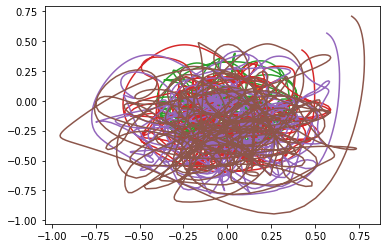

In [0]:
t = np.arange(0,20,0.01)
p = integrate_pendulum(n=5, times=t)
x, y = get_xy_coords(p)
plt.plot(x, y);

In [0]:
from matplotlib import animation


def animate_pendulum(n):
    dt=0.04
    t = np.arange(0,10,dt)
    p = integrate_pendulum(n, t)
    x, y = get_xy_coords(p)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.grid()
    ax.set(xlim=(-1, 1), ylim=(-1, 1))

    line, = ax.plot([], [], 'o-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        line.set_data(x[i], y[i])
        return line,

    anim = animation.FuncAnimation(fig, animate, frames=len(t),
                                   interval=1000 * dt,
                                   blit=True, init_func=init)
    plt.close(fig)
    return anim


In [0]:
anim = animate_pendulum(8)

/usr/local/lib/python3.6/dist-packages/sympy/physics/mechanics/kane.py:533: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


In [0]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### sympy 연습 & 공부

In [0]:
g='g'
l='l'
m='m'
parameters = [g] + list(l) + list(m)
print(parameters)

['g', 'l', 'm']


In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols
n=10

m = symbols('m:{0}'.format(n))
print(m)
print(m[1])
A='m:{0}'.format(n)
print(A)

In [0]:
import numpy as np

from sympy import symbols
from sympy import Dummy, lambdify
n=3
m = symbols('m:{0}'.format(n))
n = symbols('n:{0}'.format(n))
print(m+n)
unknowns = [Dummy() for i in m + n]
print(unknowns,len(unknowns))
unknown_dict = dict(zip(m+n, unknowns))
print(zip(m+n,unknowns))
print(unknown_dict)


(m0, m1, m2, n0, n1, n2)
[_Dummy_145, _Dummy_146, _Dummy_147, _Dummy_148, _Dummy_149, _Dummy_150] 6
{m0: _Dummy_145, m1: _Dummy_146, m2: _Dummy_147, n0: _Dummy_148, n1: _Dummy_149, n2: _Dummy_150}


In [0]:
'''
순서가 없기 때문에 인덱스로는 접근할수 없고, 키로 접근 할 수 있습니다.
>>> d = {'abc' : 1, 'def' : 2}
>>> d[0]
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
KeyError: 0
>>> d['abc']
1
앞에있는 것이 키 
'''

In [0]:
from sympy.interactive.printing import init_printing
init_printing(pretty_print=False)
from sympy.matrices import *
Matrix([[1,0], [0,1]])

Matrix([
[1, 0],
[0, 1]])

###Dynamics with Sympy Mechanics 공부
[YouThttps://www.youtube.com/watch?v=Jtt9hexk93o \
[쥬피터 노트북](nbviewer.jupyter.org/github/PythonDynamics/pcydy_examples/blob/master/mass_spring_damper/mass_spring_damper.ipynb) \
[2013 mechnics html](https://github.com/pydy/scipy-2013-mechanics)

In [0]:
from sympy import symbols
from sympy.physics.mechanics import *
N=mechanics.ReferenceFrame('N')
#dir(N)

a1,a2,a3= symbols('a1 a2 a3')
w=a1*N.x+a2*N.y+a3*N.z
n=4*N.x+5*N.z

mechanics.dot(n,w)
z=mechanics.cross(n,w)
print(z)
z.diff(a1,N)


- 5*a2*N.x + (5*a1 - 4*a3)*N.y + 4*a2*N.z


5*N.y

In [0]:
A=ReferenceFrame('A')
alpha=symbols('alpha')
A.orient(N,'axis',[alpha,N.x])
A.dcm(N)

Matrix([
[1,           0,          0],
[0,  cos(alpha), sin(alpha)],
[0, -sin(alpha), cos(alpha)]])

In [0]:
w.express(A)

a1*A.x + (a2*cos(alpha) + a3*sin(alpha))*A.y + (-a2*sin(alpha) + a3*cos(alpha))*A.z

In [0]:
print(z.express(A))
z.express(A,variables=True)


- 5*a2*A.x + (4*a2*sin(alpha) + (5*a1 - 4*a3)*cos(alpha))*A.y + (4*a2*cos(alpha) - (5*a1 - 4*a3)*sin(alpha))*A.z


- 5*a2*A.x + (4*a2*sin(alpha) + (5*a1 - 4*a3)*cos(alpha))*A.y + (4*a2*cos(alpha) - (5*a1 - 4*a3)*sin(alpha))*A.z

In [0]:
P=Point('P')
P.

In [0]:
import sympy as sym
import sympy.physics.mechanics as me

sym.init_printing()

x, v = me.dynamicsymbols('x v')
m, c, k, g, t = sym.symbols('m c k g t')
ceiling = me.ReferenceFrame('C')
o = me.Point('o')
p = me.Point('p')
o.set_vel(ceiling, 0)
p.set_pos(o, x * ceiling.x)
p.set_vel(ceiling, v * ceiling.x)

damping = -c * p.vel(ceiling)
stiffness = -k * p.pos_from(o)
gravity = m * g * ceiling.x
forces = damping + stiffness + gravity
forces
zero = me.dot(forces - m * p.acc(ceiling), ceiling.x)

zero

dvdt = sym.solve(zero, v.diff(t))[0]
dxdt = v
dvdt, dxdt

mass = me.Particle('mass', p, m)

#First define a particle which represents the mass attached to the damper and spring.
kane = me.KanesMethod(ceiling, q_ind=[x], u_ind=[v], kd_eqs=[v - x.diff(t)])
me.LagrangesMethod()
ceiling.orientnew()


-c*v(t) + g*m - k*x(t) - m*Derivative(v(t), t)

In [0]:

from sympy import symbols
import sympy as sym
from sympy.physics.mechanics import *
init_vprinting()
q= dynamicsymbols('q')
qd= dynamicsymbols('q',1)
m,k,b=symbols('m k b')
N=ReferenceFrame('N')
P=Point('P')
P.set_vel(N,qd*N.x)

Pa=Particle('Pa',P,m)
Pa.potential_energy=k*q**2/2
L=Lagrangian(N,Pa)
fl=[(P,-b*qd*N.x)]
l=LagrangesMethod(L,[q],forcelist=fl,frame=N)
l.form_lagranges_equations()
A,B=l.rhs()
print(A)
print(B)


Derivative(q(t), t)
(-b*Derivative(q(t), t) - k*q(t))/m


In [0]:
#@title 실패
from sympy import symbols
import sympy as sym

from sympy.physics.mechanics import *
v0,q0,q1=dynamicsymbols('v0 q0 q1')
dv0,dq0,dq1=v0,q0,q1=dynamicsymbols('v0 q0 q1',1)
m0,m1,m2=symbols('m0 m1 m2')
l1,l2=symbols('l1 l2')
g,t=symbols('g t')
N=ReferenceFrame('N')
A=ReferenceFrame('A')
O=Point('O')

M0=Point('M0')
M1=Point('M1')
M2=Point('M2')

M0.set_pos(O,0),M0.set_vel(N,v0*N.x)
A0=A.orientnew('A0','axis',[q0,A.z])
A0.set_ang_vel(N,dq0*A.z)
A1=A.orientnew('A1','axis',[q1,A.z])
A1.set_ang_vel(N,dq1*A.z)

M1=M0.locatenew('M1',l1*A0.x)
M2=M1.locatenew('M2',l2*A1.x)
M1.v2pt_theory(M0,N,A0)
M2.v2pt_theory(M0,N,A1)
Ma0=Particle('Ma0',M0,m0)
Ma1=Particle('Ma1',M1,m1)
Ma2=Particle('Ma2',M2,m2)

particles = [M0,M1,M2]
forces = [(M0,0),(M1,m1*g*A.y),(M2,m2*g*A.y)]
kinetic_odes = [(q[0].diff(t)-u[0]),(q[1].diff(t)-u[1]),(q[2].diff(t)-u[2])]


In [0]:
#@title 실패2
from sympy import symbols
import sympy as sym

from sympy.physics.mechanics import *
x,y=symbols('x y')
x0,q0,q1=dynamicsymbols('x0 q0 q1')
dx0,dq0,dq1=dynamicsymbols('x0 q0 q1',1)
m0,m1,m2=symbols('m0 m1 m2')
g,t=symbols('g,t')
l1,l2=symbols('l1,l2')

N=ReferenceFrame('N')
A0=N.orientnew('A0',)

X0=dx0*N.x
X1=X0+l1*sym.sin()
X2=X1+l1*sym.cos(q1)
#



### 7-40 성공 
스크랩 + 연습 using kane's method

In [0]:
from sympy import symbols
from sympy.physics.mechanics import *

n=2

q=dynamicsymbols('q:'+str(n+1))
u=dynamicsymbols('u:'+str(n+1))
f=dynamicsymbols('f')

m=symbols('m:'+str(n+1))
l=symbols('l:'+str(n))
g,t=symbols('g t')

I=ReferenceFrame('I')
O=Point('O')
O.set_vel(I,0)

P0=Point('P0')
P0.set_pos(O,q[0]*I.x)
P0.set_vel(I,u[0]*I.x)
Pa0=Particle('Pa0',P0,m[0])

frames=[I]
points=[P0]
particles=[Pa0]
forces=[(P0,f*I.x-m[0]*g*I.y)]
kindiffs=[(q[0].diff(t)-u[0])]

for i in range(n):
    Bi = I.orientnew('B' + str(i), 'Axis', [q[i + 1], I.z])   # Create a new frame
    Bi.set_ang_vel(I, u[i + 1] * I.z)                         # Set angular velocity
    frames.append(Bi)                                         # Add it to the frames list

    Pi = points[-1].locatenew('P' + str(i + 1), l[i] * Bi.x)  # Create a new point
    Pi.v2pt_theory(points[-1], I, Bi)                         # Set the velocity
    points.append(Pi)                                         # Add it to the points list

    Pai = Particle('Pa' + str(i + 1), Pi, m[i + 1])           # Create a new particle
    particles.append(Pai)                                     # Add it to the particles list

    forces.append((Pi, -m[i + 1] * g * I.y))                  # Set the force applied at the point

    kindiffs.append(q[i + 1].diff(t) - u[i + 1])              # Define the kinematic ODE:  dq_i / dt - u_i = 0

kane = KanesMethod(I, q_ind=q, u_ind=u, kd_eqs=kindiffs) # Initialize the object
fr, frstar = kane.kanes_equations(forces, particles)     # Generate EoM's fr + frstar = 0


/usr/local/lib/python3.6/dist-packages/sympy/physics/mechanics/kane.py:533: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


In [0]:
from sympy import Dummy, lambdify, pprint
from numpy import array, hstack, zeros, linspace, pi,ones, shape, arange
from numpy.linalg import solve
from scipy.integrate import odeint

In [0]:
arm_length = 1. / n                          # The maximum length of the pendulum is 1 meter
arm_lengtH=[1/6,2/6,3/6]
bob_mass = 0.01 / n                          # The maximum mass of the bobs is 10 grams
parameters = [g, m[0]]                       # Parameter definitions starting with gravity and the first bob
parameter_vals = [9.81, 0.02 / n]            # Numerical values for the first two
for i in range(n):                           # Then each mass and length
    parameters += [l[i], m[i + 1]]
    parameter_vals += [arm_length, bob_mass]

In [0]:
dynamic = q + u                                                # Make a list of the states
dynamic.append(f)                                              # Add the input force
dummy_symbols = [Dummy() for i in dynamic]                     # Create a dummy symbol for each variable
dummy_dict = dict(zip(dynamic, dummy_symbols))
kindiff_dict = kane.kindiffdict()                              # Get the solved kinematical differential equations
MF=kane.mass_matrix_full
FF=kane.forcing_full
M = kane.mass_matrix_full.subs(kindiff_dict).subs(dummy_dict)  # Substitute into the mass matrix 
F = kane.forcing_full.subs(kindiff_dict).subs(dummy_dict)      # Substitute into the forcing vector
M_func = lambdify(dummy_symbols + parameters, M)               # Create a callable function to evaluate the mass matrix 
F_func = lambdify(dummy_symbols + parameters, F)               # Create a callable function to evaluate the forcing vector 



In [0]:
def right_hand_side(x, t, args):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(2 * (n + 1))
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(2 * (n + 1))
        The derivative of the state.
    
    """
    u = 0.0                              # The input force is always zero     
    arguments = hstack((x, u, args))     # States, input, and parameters
    dx = array(solve(M_func(*arguments), # Solving for the derivatives
        F_func(*arguments))).T[0]

    return dx


In [0]:
x0=array([0,-30*pi/180,-30*pi/180,1,0,1])
dt=0.01
t = arange(0,10,dt)                                        # Time vector
y = odeint(right_hand_side, x0, t, args=(parameter_vals,))         # Actual integration


In [0]:

from numpy import zeros, cos, sin, arange, around
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from IPython.display import HTML

In [0]:
def animate_pendulum(t, states, length, filename=None):
    """Animates the n-pendulum and optionally saves it to file.

    Parameters
    ----------
    t : ndarray, shape(m)
        Time array.
    states: ndarray, shape(m,p)
        State time history.
    length: float
        The length of the pendulum links.
    filename: string or None, optional
        If true a movie file will be saved of the animation. This may take some time.

    Returns
    -------
    fig : matplotlib.Figure
        The figure.
    anim : matplotlib.FuncAnimation
        The animation.

    """
    # the number of pendulum bobs
    numpoints = int(states.shape[1] / 2)
   

    # first set up the figure, the axis, and the plot elements we want to animate
    fig = plt.figure()

    # some dimesions
    cart_width = 0.4
    cart_height = 0.2

    # set the limits based on the motion
    xmin = around(states[:, 0].min() - cart_width / 2.0, 1)
    xmax = around(states[:, 0].max() + cart_width / 2.0, 1)

    # create the axes
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1.1, 1.1), aspect='equal')

    # display the current time
    time_template = 'time = %.1fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    # create a rectangular cart
    rect = Rectangle([states[0, 0] - cart_width / 2.0, -cart_height / 2],
        cart_width, cart_height, fill=True, color='red', ec='black')
    ax.add_patch(rect)

    # blank line for the pendulum
    line, = ax.plot([], [], lw=2, marker='o', markersize=6)
    sc1,=ax.plot([],[],lw=1,alpha=0.8,color=[1, 0, 0, 0.698])
    sc2,=ax.plot([],[],lw=1,alpha=0.8,color=[0.8, 0, 0, 0.498])
    sc3,=ax.plot([],[],lw=1,alpha=0.8,color=[0.6, 0, 0, 0.298])

    # initialization function: plot the background of each frame
    def init():
        time_text.set_text('')    
        rect.set_xy((0.0, 0.0))
        line.set_data([], [])
        return time_text, rect, line,
    
    xc=[[],[],[]]
    yc=[[],[],[]]

    # animation function: update the objects
    def animate(i):
        time_text.set_text(time_template % (i*dt))
        rect.set_xy((states[i, 0] - cart_width / 2.0, -cart_height / 2))
        
        x = hstack((states[i, 0], zeros((numpoints - 1))))
        y = zeros((numpoints))
        for j in arange(1, numpoints):
            x[j] = x[j - 1] + length * cos(states[i, j])
            y[j] = y[j - 1] + length * sin(states[i, j])
        line.set_data(x, y)
        
        xc[0].append(x[-1])
        xc[1].append(x[-2])
        if n>2:
            xc[2].append(x[-3])
            yc[2].append(y[-3])
            sc3.set_data(xc[2],yc[2])
        yc[0].append(y[-1])
        yc[1].append(y[-2])
        

        sc1.set_data(xc[0],yc[0])
        sc2.set_data(xc[1],yc[1])
        


        return time_text, rect, line,

    # call the animator function
    anim2 = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init,
            interval=dt * 1000, blit=True, repeat=False)
    return anim2
    # save the animation if a filename is given


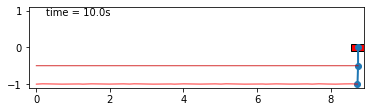

In [0]:
anim2=animate_pendulum(t, y, arm_length)
HTML(anim2.to_html5_video())

In [0]:
G=1
M2,M3=1,1
R12,R13=2,2
X12=313
Y12=1232
X13=12134
Y13=125
Fx,Fy=-M2*G*(X12)/(R12**3)-M3*G*(X13)/(R13**2),\
    -M2*G*(X12)/(R12**3)-M3*G*(X13)/(R13**2)
Fx,Fy

(-3072.625, -3072.625)

#Gravitational particle movement

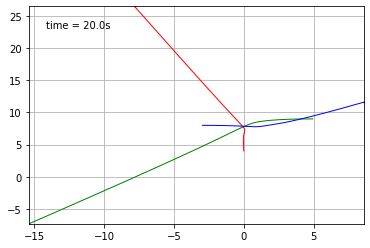

In [19]:
#너무 지저분해서 이것을 numnpy를 사용해서 깨끗! 하게 만들어 보고싶으데 가능?
#-> numpy [,]이것을 matplotlib에서 좌표를 얻을수 있는지 확인을 해봐야함.

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import cos,sin
from IPython.display import HTML
import matplotlib.animation as animation

### Initial condition ###
G=6.67384e-1

M1,M2,M3=1,1,1
X1,Y1=0,4
dX1,dY1=0,0.5
X2,Y2=5,9
dX2,dY2=-1,0
X3,Y3=-3,8
dX3,dY3=1,0

### state ###
state=[X1,X2,X3,dX1,dX2,dX3,Y1,Y2,Y3,dY1,dY2,dY3]
              # 0  1   2  3   4   5   6  7  8  9  10  11

dt=0.05
t=np.arange(0,20,dt)
tc=0
### def derivs func
def derivs(state,t):
    dxdt=np.zeros_like(state)
    X12,Y12=state[0]-state[1],state[6]-state[7]
    X13,Y13=state[0]-state[2],state[6]-state[8]
    X23,Y23=state[1]-state[2],state[7]-state[8]

    R12=(X12**2+Y12**2)**0.5
    R13=(X13**2+Y13**2)**0.5
    R23=(X23**2+Y23**2)**0.5
    
    dxdt[0],dxdt[1],dxdt[2]=state[3],state[4],state[5]
    dxdt[6],dxdt[7],dxdt[8]=state[9],state[10],state[11]
    dxdt[3],dxdt[9]=-M2*G*(X12)/(R12**3)-M3*G*(X13)/(R13**3),\
    -M2*G*(Y12)/(R12**3)-M3*G*(Y13)/(R13**3)
    dxdt[4],dxdt[10]=-M1*G*(-X12)/(R13**3)-M3*G*(X23)/(R23**3),\
    -M1*G*(-Y12)/(R13**3)-M3*G*(Y23)/(R23**3)
    dxdt[5],dxdt[11]=-M1*G*(-X13)/(R13**3)-M2*G*(-X23)/(R23**3),\
    -M1*G*(-Y13)/(R13**3)-M2*G*(-Y23)/(R23**3)
    return dxdt

T=odeint(derivs,state,t)

x1,x2,x3=T[:,0],T[:,1],T[:,2]
y1,y2,y3=T[:,6],T[:,7],T[:,8]


MAXx=max([max(x1),max(x2),max(x3)])
MINx=min([min(x1),min(x2),min(x3)])

MAXy=max([max(y1),max(y2),max(y3)])
MINy=min([min(y1),min(y2),min(y3)])
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(MINx, MAXx), 
                     ylim=(MINy,MAXy))
ax.grid()

#ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)
#circle=plt.Circle((0,0),a,color='r',fill=False)
#ax.add_artist(circle)

line1, = ax.plot([], [], 'ro-', markersize=M1)
line2, = ax.plot([], [], 'go-', markersize=M2)
line3, = ax.plot([],[],'bo-',markersize=M3)
c1, =ax.plot([],[],'r',lw=1)
c2, =ax.plot([],[],'g',lw=1)
c3, =ax.plot([],[],'b',lw=1)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    time_text.set_text('')
    return line1, time_text

X1,Y1=[],[]
X2,Y2=[],[]
X3,Y3=[],[]

CX=[]
CY=[]

inte=[]
def animate(i):
    X1.append(x1[i]),Y1.append(y1[i])
    X2.append(x2[i]),Y2.append(y2[i])
    X3.append(x3[i]),Y3.append(y3[i])
    line1.set_data(x1[i],y1[i])
    line2.set_data(x2[i],y2[i])
    line3.set_data(x3[i],y3[i])
    c1.set_data(X1,Y1)
    c2.set_data(X2,Y2)
    c3.set_data(X3,Y3)

    time_text.set_text(time_template % (i*dt))
    
    return line1,line2,line3, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(T)),
                              interval=dt*1000, blit=True, init_func=init)

HTML(ani.to_html5_video())


In [0]:
#@title numpy 이용하려는것 실패
#너무 지저분해서 이것을 numnpy를 사용해서 깨끗! 하게 만들어 보고싶으데 가능?
#-> numpy [,]이것을 matplotlib에서 좌표를 얻을수 있는지 확인을 해봐야함.
#실패 odeint 같은경우 넣어주는 state가 1차원의 자료이어야 한다.

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import cos,sin
from IPython.display import HTML
import matplotlib.animation as animation

### Initial condition ###
G=6.67384e-1

M1,M2,M3=5,1,1
r1=np.array([0,4])
dr1=np.array([0,0])
r2=np.array([5,9])
dr2=np.array([1,0])
r3=np.array([-3,8])
dr3=np.array([1,0])

### state ###
state=[r1,dr1,r2,dr2,r3,dr3]
      # 0  1   2  3   4  5 

dt=0.05
t=np.arange(0,30,dt)
tc=0
### def derivs func
def derivs(s,t):
    dxdt=np.zeros_like(s)
    r12=s[0]-s[2]
    r23=s[2]-s[4]
    r31=s[4]-s[2]

    R12=np.linalg.norm(r12)
    R23=np.linalg.norm(r23)
    R31=np.linalg.norm(r31)
    
    dxdt[0],dxdt[2],dxdt[4]=s[1],s[3],s[5]
    
    dxdt[1]=-M2*G*(r12)/(R12**3)-M3*G*(-r31)/(R31**3)
    dxdt[3]=-M1*G*(-r12)/(R12**3)-M3*G*(r23)/(R23**3)
    dxdt[5]=-M1*G*(r31)/(R13**3)-M2*G*(-r23)/(R23**3)
    return dxdt

T=odeint(derivs,state,t)


한번 def함수와 list(pop)를 이용해보아서 만들어 보자\
여러번 치는것 귀찮

In [0]:
import numpy as np

def pop(my_array,pr):
    """ row popping in numpy arrays
    Input: my_array - NumPy array, pr: row index to pop out
    Output: [new_array,popped_row] """
    i = pr
    pop = my_array[i]
    new_array = np.hstack((my_array[:i],my_array[i+1:]))
    return pop,new_array
def askstate(number):
    N=number
    mass=[]
    X=[]
    Y=[]
    Dx=[]
    Dy=[]
    for n in range(number):
        m,x,y,dx,dy=map(float,input('{}번 입자의 mass x y dx dy 입력하세요(공백)'.format(n+1)).split())
        mass.append(m)
        X.append(x)
        Y.append(y)
        Dx.append(dx)
        Dy.append(dy)
    state=X+Dx+Y+Dy

    state=np.array(state)
    return mass,state

def ask_random(number):
    N=number
    mass=[]
    raw_mass=input('{}개의 입자의 mass를 입력하세요(공백으로 구분)'.format(number)).split()
    for m in raw_mass:
        mass.append(float(m))
    X=[]
    Y=[]
    Dx=[]
    Dy=[]
    for n in range(number):
        x,y=-5+10*np.random.rand(2)
        dx,dy=0.5*np.random.randn(2)
        X.append(x)
        Y.append(y)
        Dx.append(dx)
        Dy.append(dy)
    state=X+Dx+Y+Dy

    state=np.array(state)
    return mass,state

def makeForce(mass,state,Number):
    State=state
    statex=State[:n]
    statey=State[2*n:3*n]
    Nx,statex=pop(statex,Number)
    
    Ny,statey=pop(statey,Number)
    M,mass=pop(mass,Number)

    a_x=0
    a_y=0
    
    
    for i in range(n-1):
        
        Rni_x=Nx-statex[i]
        Rni_y=Ny-statey[i]
        Rni_mag=(Rni_x**2+Rni_y**2)**0.5
        a_x+=-G*mass[i]*Rni_x/(Rni_mag**3)
        a_y+=-G*mass[i]*Rni_y/(Rni_mag**3)
    return a_x,a_y


def MAX_MIN(T):
    """max(MaxX),max(MaxY),min(MinX),min(MinY)"""
    MaxX=[]
    MaxY=[]
    MinX=[]
    MinY=[]
    for i in range(n):
        max_x,max_y=max(T[:,i]),max(T[:,2*n+i])
        min_x,min_y=min(T[:,i]),min(T[:,2*n+i])
        MaxX.append(max_x)
        MaxY.append(max_y)
        MinX.append(min_x)
        MinY.append(min_y)
    return max(MaxX),max(MaxY),min(MinX),min(MinY)

def make_loc(T):
    X=[]
    Y=[]
    for i in range(n):
        x=T[:,i]]
        y=T[:,2*n+i]
        X.append(X)
        Y.append(Y)
    return X,Y

In [26]:
n=4
mass,state=[1.0, 2.0, 1.0, 1.0],np.array([ 5.,6,-5,-5,0.,-1,0.,1.,5.,-6.,-5.,5.,-1.,0.,1.,0.])
i=3

print(mass)


4개의 입자의 mass를 입력하세요(공백으로 구분)4 2 3 4 


TypeError: ignored

할려는 개수4
4개의 입자의 mass를 입력하세요(공백으로 구분)1 5 3 20
[1.0, 5.0, 3.0, 20.0] [ 0.22131944  2.25105205  3.07962207  3.86363124  0.04056555 -0.29509452
 -0.81449474  0.1607384  -0.15192153 -1.72382453  1.72916692 -1.98444693
 -0.16956509 -0.43432098  0.31750275  0.57403809]


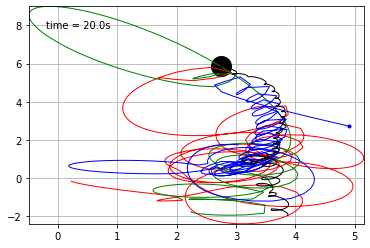

In [53]:
#너무 지저분해서 이것을 numnpy를 사용해서 깨끗! 하게 만들어 보고싶으데 가능?
#-> numpy [,]이것을 matplotlib에서 좌표를 얻을수 있는지 확인을 해봐야함.

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import cos,sin
from IPython.display import HTML
import matplotlib.animation as animation

### Initial condition ###
G=6.67384e-1
n=int(input('할려는 개수'))
mass,state=ask_random(n)
print(mass,state)

##state=X+Dx+Y+Dy##
# X :n Dx n:2n Y 2n:3n Dy 3n:4n

dt=0.05
t=np.arange(0,20,dt)
tc=0

### def derivs func
def derivs(state,t):
    dxdt=np.zeros_like(state)
    N=n
    for i in range(n):
        dxdt[i]=state[N+i]
        dxdt[2*N+i]=state[3*N+i]
        dxdt[N+i],dxdt[3*N+i]=makeForce(mass,state,i)

    return dxdt

T=odeint(derivs,state,t)

x1,x2=T[:,0],T[:,1]

x3,x4=T[:,2],T[:,3]
y1,y2=T[:,2*n],T[:,2*n+1]
y3,y4=T[:,2*n+2],T[:,2*n+3]


MAXx,MAXy,MINx,MINy=MAX_MIN(T)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(MINx, MAXx), 
                     ylim=(MINy,MAXy))
ax.grid()

#ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)
#circle=plt.Circle((0,0),a,color='r',fill=False)
#ax.add_artist(circle)


line1, = ax.plot([], [], 'ro-',markersize=mass[0])
line2, = ax.plot([], [], 'go-',markersize=mass[1])
line3, = ax.plot([],[],'bo-',markersize=mass[2])
line4, = ax.plot([],[],'ko-',markersize=mass[3])
c1, =ax.plot([],[],'r',lw=1)
c2, =ax.plot([],[],'g',lw=1)
c3, =ax.plot([],[],'b',lw=1)
c4, =ax.plot([],[],'k',lw=1)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line1.set_data([], [])
    time_text.set_text('')
    return line1, time_text

X_zip,Y_zip=make_loc(T)
X1,Y1=[],[]
X2,Y2=[],[]
X3,Y3=[],[]
X4,Y4=[],[]
#X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
CX=[]
CY=[]

inte=[]
def animate(i):
    X1.append(x1[i]),Y1.append(y1[i])
    X2.append(x2[i]),Y2.append(y2[i])
    X3.append(x3[i]),Y3.append(y3[i])
    X4.append(x4[i]),Y4.append(y4[i])
    line1.set_data(x1[i],y1[i])
    line2.set_data(x2[i],y2[i])
    line3.set_data(x3[i],y3[i])
    line4.set_data(x4[i],y4[i])
    c1.set_data(X1,Y1)
    c2.set_data(X2,Y2)
    c3.set_data(X3,Y3)
    c4.set_data(X4,Y4)

    time_text.set_text(time_template % (i*dt))
    
    return line1,line2,line3, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(T)),
                              interval=dt*1000, blit=True, init_func=init)

HTML(ani.to_html5_video())


In [50]:
X_zip,Y_zip=make_loc(T)
X_zip

[[...], [...], [...], [...]]

In [58]:
#@title dict사용법
a={}
for i in range(4):
    sample={'a{}'.format(i):i}
    a.update(sample)
print(a)

{'a0': 0, 'a1': 1, 'a2': 2, 'a3': 3}


In [0]:
#@title using kane's method

from sympy import symbols
from sympy.physics.mechanics import *

n=2
x=dynamicsymbols('x:'+str(n))
y=dynamicsymbols('y:'+str(n))
dx=dynamicsymbols('x:'+str(n),1)
dy=dynamicsymbols('y:'+str(n),1)

f=dynamicsymbols('f')

m=symbols('m:'+str(n))
G,t=symbols('g t')

I=ReferenceFrame('I')
O=Point('O')
O.set_vel(I,0)

P0=Point('P0')
V0=x[0]*I.x+y[0]*I.y
P0.set_pos(O,V0)
P0.set_vel(I,dx[0]*I.x+dy[0]*I.y)
Pa0=Particle('Pa0',P0,m[0])

P1=Point('P1')
V1=x[1]*I.x+y[1]*I.y
R01=(V0-V1)
R02=(V1-V0)

print(R01)
P1.set_pos(O,V1)
P1.set_vel(I,dx[1]*I.x+dy[1]*I.y)
Pa1=Particle('Pa1',P0,m[1])

frames=[I]
points=[P0]
particles=[Pa0]
forces=[(P0,-m[0]*m[1]*g*R01/(R01.magnitude()**3))]
kindiffs=[(q[0].diff(t)-u[0])]

for i in range(n):
    Bi = I.orientnew('B' + str(i), 'Axis', [q[i + 1], I.z])   # Create a new frame
    Bi.set_ang_vel(I, u[i + 1] * I.z)                         # Set angular velocity
    frames.append(Bi)                                         # Add it to the frames list

    Pi = points[-1].locatenew('P' + str(i + 1), l[i] * Bi.x)  # Create a new point
    Pi.v2pt_theory(points[-1], I, Bi)                         # Set the velocity
    points.append(Pi)                                         # Add it to the points list

    Pai = Particle('Pa' + str(i + 1), Pi, m[i + 1])           # Create a new particle
    particles.append(Pai)                                     # Add it to the particles list

    forces.append((Pi, -m[i + 1] * g * I.y))                  # Set the force applied at the point

    kindiffs.append(q[i + 1].diff(t) - u[i + 1])              # Define the kinematic ODE:  dq_i / dt - u_i = 0

kane = KanesMethod(I, q_ind=q, u_ind=u, kd_eqs=kindiffs) # Initialize the object
fr, frstar = kane.kanes_equations(forces, particles)     # Generate EoM's fr + frstar = 0



# Potential field visualize

***sclab1*** [Plotting streamlines with Matplotlib and SymPy](https://tonysyu.github.io/plotting-streamlines-with-matplotlib-and-sympy.html#.XgtRwzJR2Uk)\
***sclab2*** [Gravitational potential created by a thin disc using FEM and NDSolve](https://mathematica.stackexchange.com/questions/164141/gravitational-potential-created-by-a-thin-disc-using-fem-and-ndsolve)\
***sclab3***[Simple way to draw electric field lines using Plotly.offline; convert from Matplotlib.pyplot](https://pythonmatplotlibtips.blogspot.com/2017/12/simple-way-to-draw-electric-field-lines-using-plotly-offline.html)

Time:  0.39225719800001


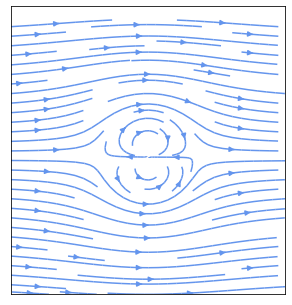

In [0]:
import sympy
from sympy.abc import x, y
import timeit



def cylinder_stream_function(U=1, R=1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

def velocity_field(psi):
    u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v
import numpy as np

def plot_streamlines(ax, u, v, xlim=(-1, 1), ylim=(-1, 1)):
    x0, x1 = xlim
    y0, y1 = ylim
    Y, X =  np.ogrid[y0:y1:100j, x0:x1:100j]
    ax.streamplot(X, Y, u(X, Y), v(X, Y), color='cornflowerblue')

def format_axes(ax):
    ax.set_aspect('equal')
    ax.figure.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])


import matplotlib.pyplot as plt
start = timeit.default_timer()
psi = cylinder_stream_function()
u, v = velocity_field(psi)

xlim = ylim = (-3, 3)
fig, ax = plt.subplots(figsize=(4, 4))
plot_streamlines(ax, u, v, xlim, ylim)

c = plt.Circle((0, 0), radius=1, facecolor='none')
ax.add_patch(c)

format_axes(ax)

stop = timeit.default_timer()

print('Time: ', stop - start)  

[[-2 -1  0  1  2 -1]
 [-2 -1  0  1  2  2]]


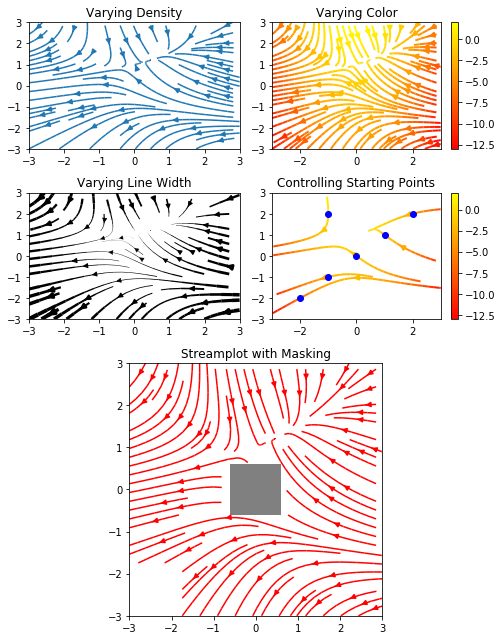

In [0]:
#@title Matplolib pyplot streamplot Example
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
#gridspec == 그래프를 여러가지를 하나로 만들기위한 그래프

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])
print(seed_points)
ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w=10
Y,X=np.mgrid([-w:w:100j,-w:w:100j])
m=1
g=9.8
r=np.sqrt(X**2+Y**2)
U=-g*m/r
V=

SyntaxError: ignored

In [0]:
import numpy as np
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
 
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
    q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E  = E_point_charge(C.q, C.pos, x, y)
        Ex = Ex+E[0]
        Ey = Ey+E[1]
    return [ Ex, Ey ]

def E_dir(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    n = np.sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]

In [0]:
from scipy.integrate import ode

# charges and positions
charges = [charge( -3, [0.56, 0.56]),
           charge(1, [0.26, 0.76]),
           charge( 1, [0.66, 0.16]),
           charge(1, [0.66, 0.86]) ]

# calculate field lines
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8*R
    if C.q < 0:
        # because the electric field lines start only from positive charge,
        # skip the process when the current charges is negative.
        continue
    # loop over field lines starting in different directions 
    # around current charge
    for alpha in np.linspace(0, 2*np.pi*31/32, 32):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [ C.pos[0] + np.cos(alpha)*R ]
        y = [ C.pos[1] + np.sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        cnt = 0
        while r.successful():
            Enorm = E_total(r.y[0],r.y[1],charges)
            Enorm = (Enorm[0]**2 + Enorm[1]**2)**0.5
            a = 5
            dt = R*a*Enorm**(-0.4)
            #if cnt % 1000 == 0:
            #    print(r.y[0],r.y[1],Enorm,dt2)
            #cnt += 1
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            # check if field line ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge = True
            if hit_charge:
                break
        xs.append(x)
        ys.append(y)

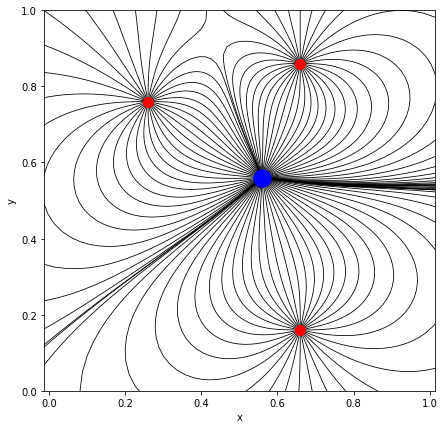

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7),facecolor="w")
ax = fig.add_subplot(111)

# plot field line
for x, y in zip(xs,ys):
    ax.plot(x, y, color="k",lw=0.8)

# plot point charges
for C in charges:
    if C.q>0:
        ax.plot(C.pos[0], C.pos[1], 'ro', ms=10*np.sqrt(C.q))
    if C.q<0:
        ax.plot(C.pos[0], C.pos[1], 'bo', ms=10*np.sqrt(-C.q))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal','datalim')
plt.savefig('electric_field_lines_pyplot_wo_mayavi.png',
            dpi=250,bbox_inches="tight",pad_inches=0.02)
plt.show()

https://oceancoding.blogspot.com/2019/06/blog-post_24.html

# 파이썬을 제대로 공부해보자


-
--


cf:[wiki docs](https://wikidocs.net/17684)

cf:[school webs](http://schoolofweb.net/blog/posts/파이썬-퍼스트클래스-함수-first-class-function/)


---


> **추천 에디터**  : 
*   비주얼 스투디오(visual studio)
*   파이참(pycharm)









## **wikidocs 점프투 파이썬** 


### 02-2 문자열 자료형
>이스케이프 코드 
* \n	문자열 안에서 줄을 바꿀 때 사용
* \t	문자열 사이에 탭 간격을 줄 때 사용
* \\	문자 \를 그대로 표현할 때 사용
* \'	작은따옴표(')를 그대로 표현할 때 사용
* \"	큰따옴표(")를 그대로 표현할 때 사용
* \r	캐리지 리턴(줄 바꿈 문자, 현재 커서를 가장 앞으로 이동)
* \f	폼 피드(줄 바꿈 문자, 현재 커서를 다음 줄로 이동)
* \a	벨 소리(출력할 때 PC 스피커에서 '삑' 소리가 난다)
* \b	백 스페이스
* \000	널 문자



In [0]:

ec_code=['\"change line" \n',
         '\"tab\"\t',
         '\"bell sound\"\a',
         '\"back space\"\b\b\b'
         '\"null word\"\000']
for ec in ec_code:
    print("\'"'hello priend',ec, 'How are you'"\'")


'hello priend "change line" 
 How are you'
'hello priend "tab"	 How are you'
'hello priend "bell sound" How are you'
'hello priend "back space""null word"  How are you'
'hello priend "form feed" and then How are you'


**format 함수를 이용한 문자 포메팅과 함수**


In [0]:
a=f'\'{0:^10}\''
b=f'{"hi"*10:*^30}' # :< 왼쪽 정렬, :>오른쪽 정렬 :^가운데 정렬
print(a)
print(b)

'    0     '
*****hihihihihihihihihihi*****


In [0]:
#문자열관련 함수들
'''
문자의 수를 세어주는 count
특정한 문자를 찾아주는 find
'''
cont= 'I have a dream a sing to song\nI can see the wonder'
find=cont.find('have')  #포함하는 글자중 제일 처음
index=cont.index(' ')   #잘못하면 에러남


1 1 1


마지막 공부한 곳 https://wikidocs.net/13 upper 부분

# 코딩 조각들 모음

##이중으로된 반복문 빠져나가기

In [0]:
#이중으로 된 반복문을 특별한 goto, if, 변수없이 중단하는 방법이다.
#실행하는 개수가 많을때 쓸만할꺼 같다.
for i in range(5000):
    for j in range(3000):
        if j > 1000:
           break
    else: 
        continue # no break encountered
    break

##sympy 쓰는것을 배우자

[0.3        0.28968966 0.27937931 0.26906897 0.25875862 0.24844828
 0.23813793 0.22782759 0.21751724 0.2072069  0.19689655 0.18658621
 0.17627586 0.16596552 0.15565517 0.14534483 0.13503448 0.12472414
 0.11441379 0.10410345 0.0937931  0.08348276 0.07317241 0.06286207
 0.05255172 0.04224138 0.03193103 0.02162069 0.01131034 0.001     ]


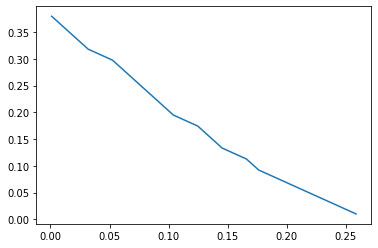

In [0]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
K=np.linspace(0.3,0.001,30)
print(K)
M=np.linspace(0.4,0.01,20)
#X,Y=np.meshgrid(x,y)

x,y,z=symbols('x y z')
v0=symbols('v0')
k=0.05
vh=v0/3.6
m=0.2
g=9.8


f=100-vh/k+m*g/(k**2)*log(k*vh/(m*g)+1)
#fz=100-vh/X+Y*g/(X**2)*log(X*vh/(Y*g)+1)

def func(f):
    vh=v0/3.6
    g=9.8
    return 100-vh/f[0]+f[1]*g/(f[0]**2)*log(f[0]*vh/(f[1]*g)+1)
#Z=solve(fz,v0)[1]
#print(Z)
Ov_k=[]
Ov_m=[]
for y in M:
    km=[K[-1],y]
    sol=solve(func(km),v0)[1]
    if sol>100:
        pass
    else: 
        for x in K:
            km=[x,y]
            sol=solve(func(km),v0)[1]
            if sol<100:
                Ov_k.append(x)
                Ov_m.append(y)
                break
            pass

plt.plot(Ov_k,Ov_m)
plt.show()
#영역을 설정해 주는것을 찾아보자
#영역의 안

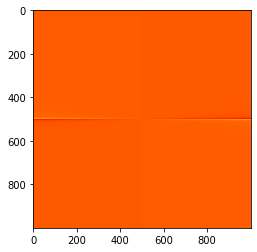

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-100,100,1000)
y=np.linspace(-100,100,1000)
X,Y=np.meshgrid(x,y)
Z=X/Y
plt.imshow(Z,cmap='hot')

#DECORATOR 연습 

In [0]:
def add_wrapping(item):
    def wrapped_item():
        return '포장된 한상자의 {}'.format(str(item()))
    return wrapped_item

@add_wrapping #칸을 띄어쓰기 한후에 해도 똑같은 결과를 얻는다.
def new_pen():
    return '몽블랑 신상 만년필'

def new_phone():
    return '겔럭시 노트 10 +'
print(new_pen())
print(new_phone())
@add_wrapping
#print(new_phone()) 해주면 오류가 뜬다. 설명에서 item 이뜨기 때문에
#메소드나 함수를 넣어주어야 할것 같다.
#a='abc초콜렛'
#print(a)해도 오류가 난다.
def a():return'abc초콜렛'
print(a())

@add_wrapping
@add_wrapping

#@add_wrapping*10는 오류가 뜬다.
def z():
    return '돈상자'
print(z())

포장된 한상자의 몽블랑 신상 만년필
겔럭시 노트 10 +
포장된 한상자의 abc초콜렛
포장된 한상자의 포장된 한상자의 돈상자


In [0]:
from functools import wraps
def add_wrapping_with_style(style):
    def add_wrapping(item):
        @wraps(item)
        def wrapped_item():
            return '{} 포장된 한상자의 {}'.format(style,str(item()))
        return wrapped_item
    return add_wrapping

@add_wrapping_with_style('멋지게')
@add_wrapping_with_style('비싸보이게')
def new_pen():
    return '몽블랑 신상 만년필'

print(new_pen())

멋지고 포장된 한상자의 비싸보이게 포장된 한상자의 몽블랑 신상 만년필


In [0]:
 print('%(language)s has %(number)04d quote types.' %
...       {'language': "Python", "number": 2})

Python has 0002 quote types.
